<a href="https://colab.research.google.com/github/ronanmccormack-ca/ProgrammingforBigData/blob/main/Big%20Data%20Project/Yield%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Hadoop library

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
!tar xf spark-3.0.3-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"
import findspark
import pandas as pd
findspark.init()

Create the Spark Session

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Yield Assesment")\
        .config('spark.ui.port','4050')\
        .getOrCreate()
spark

Import the Pyspark SQL functions

In [3]:
from pyspark.sql.functions import *

Import the data from my GitHub

In [4]:
!git clone https://github.com/ronanmccormack-ca/ProgrammingforBigData.git

Cloning into 'ProgrammingforBigData'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 81 (delta 26), reused 35 (delta 3), pack-reused 0
Unpacking objects: 100% (81/81), done.


Read in the inventory data

In [5]:
df = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/inventory_data.csv',header='true',inferSchema=True)

In [6]:
df.show(5, truncate=False)

+------------------+----------------+-------------------------------+--------+---------------------------------+-----------+-------------+-----------+-------------+-------------+---------------------------------------------------------------+------------------+--------------------+---------------------+---------------------+-----------------+-------------------+-------------------+------------------+----+----+----+----+----+----+----+
|measure_event_type|measure_event_id|measure_event_performed_on_date|batch_id|batch_name                       |cultivar_id|cultivar_name|location_id|location_name|work_order_id|work_order_name                                                |work_order_type_id|work_order_type_name|work_order_start_date|work_order_close_date|substance_type_id|substance_type_name|measure_event_value|measure_event_unit|_c19|_c20|_c21|_c22|_c23|_c24|_c25|
+------------------+----------------+-------------------------------+--------+---------------------------------+----------

In [7]:
df.printSchema()

root
 |-- measure_event_type: string (nullable = true)
 |-- measure_event_id: integer (nullable = true)
 |-- measure_event_performed_on_date: string (nullable = true)
 |-- batch_id: integer (nullable = true)
 |-- batch_name: string (nullable = true)
 |-- cultivar_id: integer (nullable = true)
 |-- cultivar_name: string (nullable = true)
 |-- location_id: integer (nullable = true)
 |-- location_name: string (nullable = true)
 |-- work_order_id: integer (nullable = true)
 |-- work_order_name: string (nullable = true)
 |-- work_order_type_id: integer (nullable = true)
 |-- work_order_type_name: string (nullable = true)
 |-- work_order_start_date: string (nullable = true)
 |-- work_order_close_date: string (nullable = true)
 |-- substance_type_id: integer (nullable = true)
 |-- substance_type_name: string (nullable = true)
 |-- measure_event_value: integer (nullable = true)
 |-- measure_event_unit: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = t

In [8]:
df.select(df['cultivar_name'],df['batch_name']).show(truncate=False)

+--------------+---------------------------------------+
|cultivar_name |batch_name                             |
+--------------+---------------------------------------+
|Space Cake    |Space Cake Trials 07/06/21             |
|NN1           |Shaq Fu Trial 06/30/21                 |
|NN2           |Sour Apple Truffle Trial 06/30/21      |
|NN3           |Soul Magic Trials 06/30/21             |
|NN4           |Black Do-Lato Trials 06/30/21          |
|Blue Lime PI  |Blue Lime Pi 2                         |
|Blue Lime Pi  |BLP5 - 03/09/21                        |
|Blue Lime PI  |Blue Lime Pi 2                         |
|Blue Lime PI  |Blue Lime Pi 2                         |
|Blue Lime Pi  |Blue Lime Pi 9 07/20/21 (Zkittlez Glue)|
|Space Cake    |Space Cake Trials 07/06/21             |
|Mango Merengue|Mango Merengue 08/26/21                |
|Mango Merengue|Mango Merengue 08/26/21                |
|Mango Merengue|Mango Merengue 08/26/21                |
|Blue Lime Pi  |Blue Lime Pi 9 

In [9]:
df.groupBy('cultivar_name', 'work_order_type_name')\
.count().orderBy('count',ascending=False).show(20)

+--------------+--------------------+-----+
| cultivar_name|work_order_type_name|count|
+--------------+--------------------+-----+
|    Space Cake|                null|   30|
|Mango Merengue|                null|   27|
|  Blue Lime Pi|                null|   13|
|    Space Cake|              Drying|    6|
|           NN6|                null|    5|
|  Orange Tingz|                null|    5|
|  Blue Lime Pi|              Drying|    5|
|  Blue Lime Pi|     Sample Shipment|    4|
|           NN1|                null|    4|
|           NN4|                null|    4|
|           NN3|                null|    4|
|           NN5|                null|    4|
|           NN2|                null|    4|
|           NN4| Trimming Work Order|    3|
|    Space Cake|    Sale of Cannabis|    3|
|Mango Merengue|              Drying|    3|
|  Blue Lime PI|              Drying|    3|
|         MIXED|             Milling|    3|
|           NN6| Trimming Work Order|    3|
|           NN3|              Dr

In [10]:
df.select('cultivar_name').distinct().show()

+--------------+
| cultivar_name|
+--------------+
|           NN6|
|  Orange Tingz|
|    Space Cake|
|  Blue Lime PI|
|           NN5|
|           NN3|
|         MIXED|
|Mango Merengue|
|           NN1|
|  Blue Lime Pi|
|           NN4|
|           NN2|
+--------------+



In [11]:
df.groupBy("batch_id","work_order_type_name",'cultivar_name','substance_type_name').sum('measure_event_value')\
.where((col("work_order_type_name") == 'Drying')&(col("substance_type_name")=='Dried Cannabis')).orderBy('batch_id').show()

+--------+--------------------+--------------+-------------------+------------------------+
|batch_id|work_order_type_name| cultivar_name|substance_type_name|sum(measure_event_value)|
+--------+--------------------+--------------+-------------------+------------------------+
|    7246|              Drying|  Blue Lime PI|     Dried Cannabis|                   55700|
|    9697|              Drying|  Blue Lime Pi|     Dried Cannabis|                  130662|
|   15527|              Drying|  Blue Lime Pi|     Dried Cannabis|                   51596|
|   15528|              Drying|           NN6|     Dried Cannabis|                    1230|
|   15529|              Drying|           NN5|     Dried Cannabis|                    1148|
|   15530|              Drying|           NN4|     Dried Cannabis|                    2028|
|   15531|              Drying|           NN3|     Dried Cannabis|                     967|
|   15532|              Drying|           NN2|     Dried Cannabis|              

Querying the DataFrame to identify what the cultivar ID of the highest yielding batch is.

In [12]:
df.select('batch_id','cultivar_id','work_order_type_name','work_order_close_date','substance_type_name','measure_event_value')\
.orderBy('measure_event_value')\
.filter((col('batch_id')==9697)\
        &(col("work_order_type_name")=='Drying')\
        &(col("substance_type_name")=='Dried Cannabis'))\
.show()

+--------+-----------+--------------------+---------------------+-------------------+-------------------+
|batch_id|cultivar_id|work_order_type_name|work_order_close_date|substance_type_name|measure_event_value|
+--------+-----------+--------------------+---------------------+-------------------+-------------------+
|    9697|       4494|              Drying|   2021-07-15 9:39:40|     Dried Cannabis|             130662|
+--------+-----------+--------------------+---------------------+-------------------+-------------------+



Querying the DataFrame to find other instances of the cultivar ID being identified, where the work order is again Drying and the substance is Dried Cannabis.

In [13]:
df.select('batch_id','cultivar_id','work_order_type_name','work_order_close_date','substance_type_name','measure_event_value')\
.filter((col('cultivar_id')==4494)\
        &(col("work_order_type_name")=='Drying')\
        &(col("substance_type_name")=='Dried Cannabis'))\
.groupBy('batch_id','work_order_close_date').agg(mean('measure_event_value'))\
.show()

+--------+---------------------+------------------------+
|batch_id|work_order_close_date|avg(measure_event_value)|
+--------+---------------------+------------------------+
|    9697|   2021-07-15 9:39:40|                130662.0|
|   15527|  2021-11-24 13:48:12|                 25798.0|
+--------+---------------------+------------------------+



Importing the sensor data from the growing room.

In [14]:
co2_sensor_1_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/co2_sensor_1.csv',header='true',inferSchema=True)
lux_sensor_1_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/lux_sensor_1.csv',header='true',inferSchema=True)
temp_hum_sensor_1_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/temp_hum_sensor_1.csv',header='true',inferSchema=True)
co2_sensor_2_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/co2_sensor_2.csv',header='true',inferSchema=True)
lux_sensor_2_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/lux_sensor_2.csv',header='true',inferSchema=True)
temp_hum_sensor_2_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/temp_hum_sensor_2.csv',header='true',inferSchema=True)
co2_sensor_3_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/co2_sensor_3.csv',header='true',inferSchema=True)
lux_sensor_3_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/lux_sensor_3.csv',header='true',inferSchema=True)
temp_hum_sensor_3_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/temp_hum_sensor_3.csv',header='true',inferSchema=True)
temp_hum_sensor_4_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/temp_hum_sensor_4.csv',header='true',inferSchema=True)
temp_hum_sensor_5_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/temp_hum_sensor_5.csv',header='true',inferSchema=True)
temp_hum_sensor_6_data = spark.read.csv('/content/ProgrammingforBigData/Big Data Project/data/temp_hum_sensor_6.csv',header='true',inferSchema=True)


Joining the independent datasets by their relevance to the feature.

In [15]:
co2_df = co2_sensor_1_data.unionAll(co2_sensor_2_data).unionAll(co2_sensor_3_data)
lux_df = lux_sensor_1_data.unionAll(lux_sensor_2_data).unionAll(lux_sensor_3_data)
temp_df = temp_hum_sensor_1_data.unionAll(temp_hum_sensor_2_data).unionAll(temp_hum_sensor_3_data)\
.unionAll(temp_hum_sensor_4_data).unionAll(temp_hum_sensor_5_data).unionAll(temp_hum_sensor_6_data)

Taking the 30 days leading up to the drying of the highest yielding batch and displaying the mean of the features.

In [16]:
lux_df.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('lux_mean'))\
  .filter((col('datetype')<='2021-07-15')&(col('datetype')>='2021-04-15'))\
  .join(co2_df.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('co2_mean'))\
  .filter((col('datetype')<='2021-07-15')&(col('datetype')>='2021-04-15'))\
  ,on='datetype')\
  .join(temp_df.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('temp_mean'))\
  .filter((col('datetype')<='2021-07-15')&(col('datetype')>='2021-04-15'))\
  ,on='datetype')\
  .sort('datetype',ascending=True)\
  .show()

+----------+------------------+-----------------+------------------+
|  datetype|          lux_mean|         co2_mean|         temp_mean|
+----------+------------------+-----------------+------------------+
|2021-04-15|3424.4791666666665|760.3148148148148| 64.70878472222222|
|2021-04-16| 3474.428240740741|763.2870370370371|  61.4508912037037|
|2021-04-17|3465.2060185185187|734.2592592592592| 62.21597222222223|
|2021-04-18| 3443.483796296296|671.5254629629629| 62.04751157407408|
|2021-04-19|3449.6458333333335|654.5347222222222|62.319409722222225|
|2021-04-20|3432.6296296296296|655.5208333333334|63.103611111111114|
|2021-04-21| 3404.886574074074|623.3935185185185|62.369247685185194|
|2021-04-22|3538.1805555555557|654.7199074074074| 60.62203703703704|
|2021-04-23| 4691.101851851852|631.4305555555555| 60.60847222222222|
|2021-04-24| 4669.548611111111|596.4837962962963| 60.28206018518519|
|2021-04-25| 4712.962962962963|708.7708333333334| 60.74496527777777|
|2021-04-26| 4646.805555555556|864

Taking the 30 days leading up to the drying of the lowest yielding batch and displaying the mean of the features.

In [17]:
lux_df.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('lux_mean'))\
  .filter((col('datetype')<='2021-11-24')&(col('datetype')>='2021-07-24'))\
  .join(co2_df.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('co2_mean'))\
  .filter((col('datetype')<='2021-11-24')&(col('datetype')>='2021-07-24'))\
  ,on='datetype')\
  .join(temp_df.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('temp_mean'))\
  .filter((col('datetype')<='2021-11-24')&(col('datetype')>='2021-07-24'))\
  ,on='datetype')\
  .sort('datetype',ascending=True)\
  .show()

+----------+-------------------+------------------+------------------+
|  datetype|           lux_mean|          co2_mean|         temp_mean|
+----------+-------------------+------------------+------------------+
|2021-08-04| 0.2930232558139535|1142.7197802197802| 82.68113425925925|
|2021-08-05|  5.405594405594406|1069.1468531468531| 80.62208333333336|
|2021-08-06|  0.522248243559719| 927.1232558139535| 76.10444444444445|
|2021-08-07|                0.0| 878.1113689095127| 75.42327546296295|
|2021-08-08|                0.0| 830.1925754060325| 74.20038194444444|
|2021-08-09|  2.599537037037037| 951.8816705336427| 75.50763888888889|
|2021-08-10| 2.6064814814814814|1324.7488372093023| 78.29131944444444|
|2021-08-11| 2.8356481481481484|1324.4395348837209| 80.91539351851851|
|2021-08-12|0.45011600928074247|1291.0162790697675| 87.18261574074076|
|2021-08-13|  558.2638888888889|1563.4849187935035| 91.61766203703704|
|2021-08-14| 1276.0092807424594|1284.2546296296296| 88.65925925925929|
|2021-

Saving the queries to DataFrames for further analysis.

In [18]:
batch_one = lux_df.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('lux_mean'))\
  .filter((col('datetype')<='2021-07-15')&(col('datetype')>='2021-04-15'))\
  .join(co2_df.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('co2_mean'))\
  .filter((col('datetype')<='2021-07-15')&(col('datetype')>='2021-04-15'))\
  ,on='datetype')\
  .join(temp_df.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('temp_mean'))\
  .filter((col('datetype')<='2021-07-15')&(col('datetype')>='2021-04-15'))\
  ,on='datetype')\
  .sort('datetype',ascending=True)\
  .toPandas()

In [19]:
batch_two = lux_df.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('lux_mean'))\
  .filter((col('datetype')<='2021-11-24')&(col('datetype')>='2021-07-24'))\
  .join(co2_df.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('co2_mean'))\
  .filter((col('datetype')<='2021-11-24')&(col('datetype')>='2021-07-24'))\
  ,on='datetype')\
  .join(temp_df.withColumn("ts",to_timestamp(col("Date"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .groupBy('datetype').agg(mean('Value').alias('temp_mean'))\
  .filter((col('datetype')<='2021-11-24')&(col('datetype')>='2021-07-24'))\
  ,on='datetype')\
  .sort('datetype',ascending=True)\
  .toPandas()

Performing some data cleaning and normalization for vizualization.

In [20]:
batch_one['datetype'] = pd.to_datetime(batch_one['datetype'])
batch_two['datetype'] = pd.to_datetime(batch_two['datetype'])
batch_two = batch_two.set_index('datetype')
batch_one = batch_one.set_index('datetype')

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
X = sc.fit_transform(batch_one)
batch_one_norm = pd.DataFrame(X,columns=batch_one.columns)

In [23]:
X = sc.fit_transform(batch_two)
batch_two_norm = pd.DataFrame(X,columns=batch_two.columns)

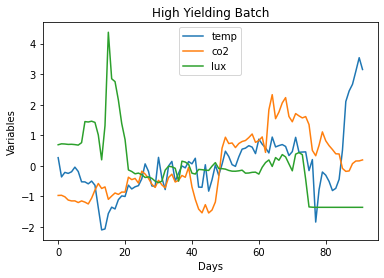

In [24]:
plt.plot(batch_one_norm.index, batch_one_norm['temp_mean'], label = "temp")
plt.plot(batch_one_norm.index, batch_one_norm['co2_mean'], label = "co2")
plt.plot(batch_one_norm.index, batch_one_norm['lux_mean'], label = "lux")
plt.title('High Yielding Batch')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Variables')
plt.show()

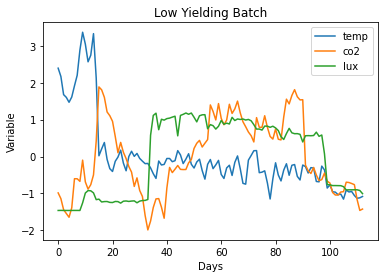

In [25]:
plt.plot(batch_two_norm.index, batch_two_norm['temp_mean'], label = "temp")
plt.plot(batch_two_norm.index, batch_two_norm['co2_mean'], label = "co2")
plt.plot(batch_two_norm.index, batch_two_norm['lux_mean'], label = "lux")
plt.title('Low Yielding Batch')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Variable')
plt.show()

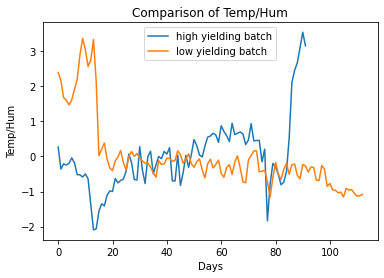

In [26]:
plt.plot(batch_one_norm.index, batch_one_norm['temp_mean'], label = "high yielding batch")
plt.plot(batch_two_norm.index, batch_two_norm['temp_mean'], label = "low yielding batch")
plt.title('Comparison of Temp/Hum')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Temp/Hum')
plt.show()

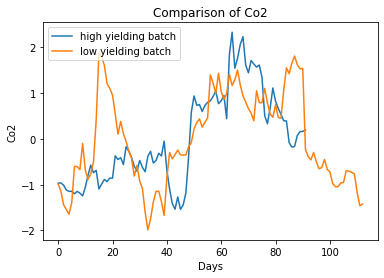

In [27]:
plt.plot(batch_one_norm.index, batch_one_norm['co2_mean'], label = "high yielding batch")
plt.plot(batch_two_norm.index, batch_two_norm['co2_mean'], label = "low yielding batch")
plt.title('Comparison of Co2')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Co2')
plt.show()

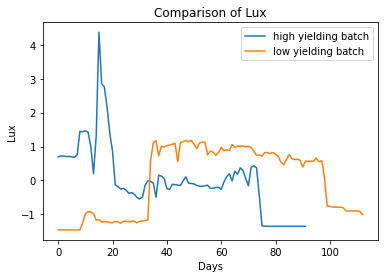

In [28]:
plt.plot(batch_one_norm.index, batch_one_norm['lux_mean'], label = "high yielding batch")
plt.plot(batch_two_norm.index, batch_two_norm['lux_mean'], label = "low yielding batch")
plt.title('Comparison of Lux')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Lux')
plt.show()

In [66]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

In [78]:
pred = kmeans.fit_predict(batch_one)
batch_one['class'] = pred

pred_two = kmeans.fit_predict(batch_two)
batch_two['class'] = pred_two

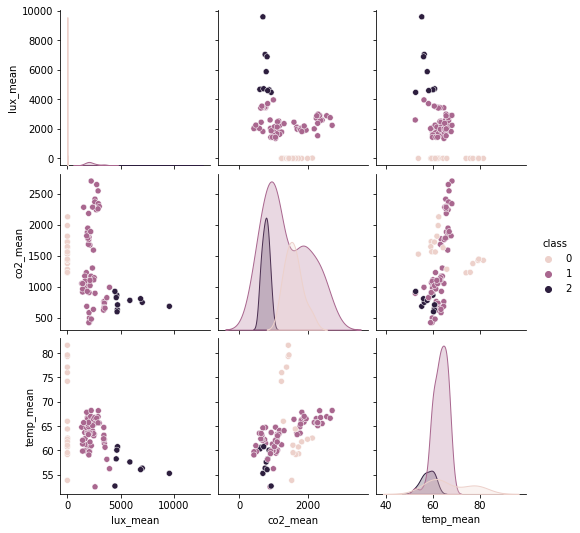

In [69]:
sns.pairplot(batch_one,hue='class')

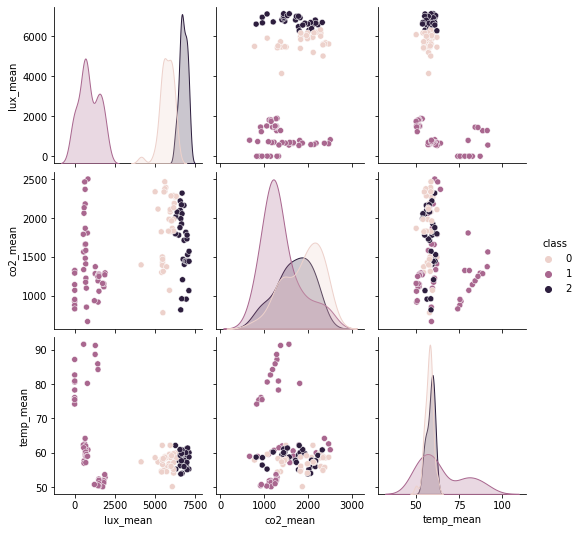

In [79]:
sns.pairplot(batch_two,hue='class')